# HEART ATTACK PREDICTION

### Import All necessary modules:

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import chi2_contingency, mannwhitneyu
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("/content/heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Schema:


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


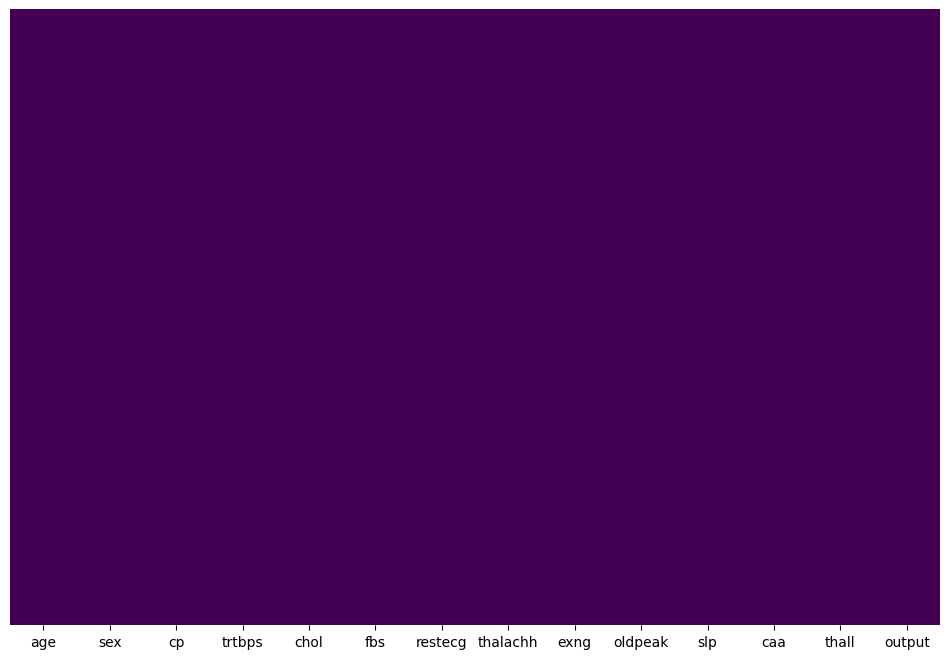

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap = 'viridis')
plt.show()

In [5]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [6]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns
print(categorical_features)

Index([], dtype='object')


In [7]:
def find_binary_numeric_features(df):
    binary_numeric_features = []
    for column in df.columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
            # Check if there are exactly two unique values
            if df[column].nunique() == 2:
                binary_numeric_features.append(column)
    return binary_numeric_features

binary_features = find_binary_numeric_features(data)
print("Binary numeric features:", binary_features)

Binary numeric features: ['sex', 'fbs', 'exng', 'output']


### EDA

<ipython-input-8-afd59e730626>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], palette='viridis')
<ipython-input-8-afd59e730626>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], palette='viridis')
<ipython-input-8-afd59e730626>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=axes[i], palette='viridis')
<ipython-input-8-afd59e730626>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

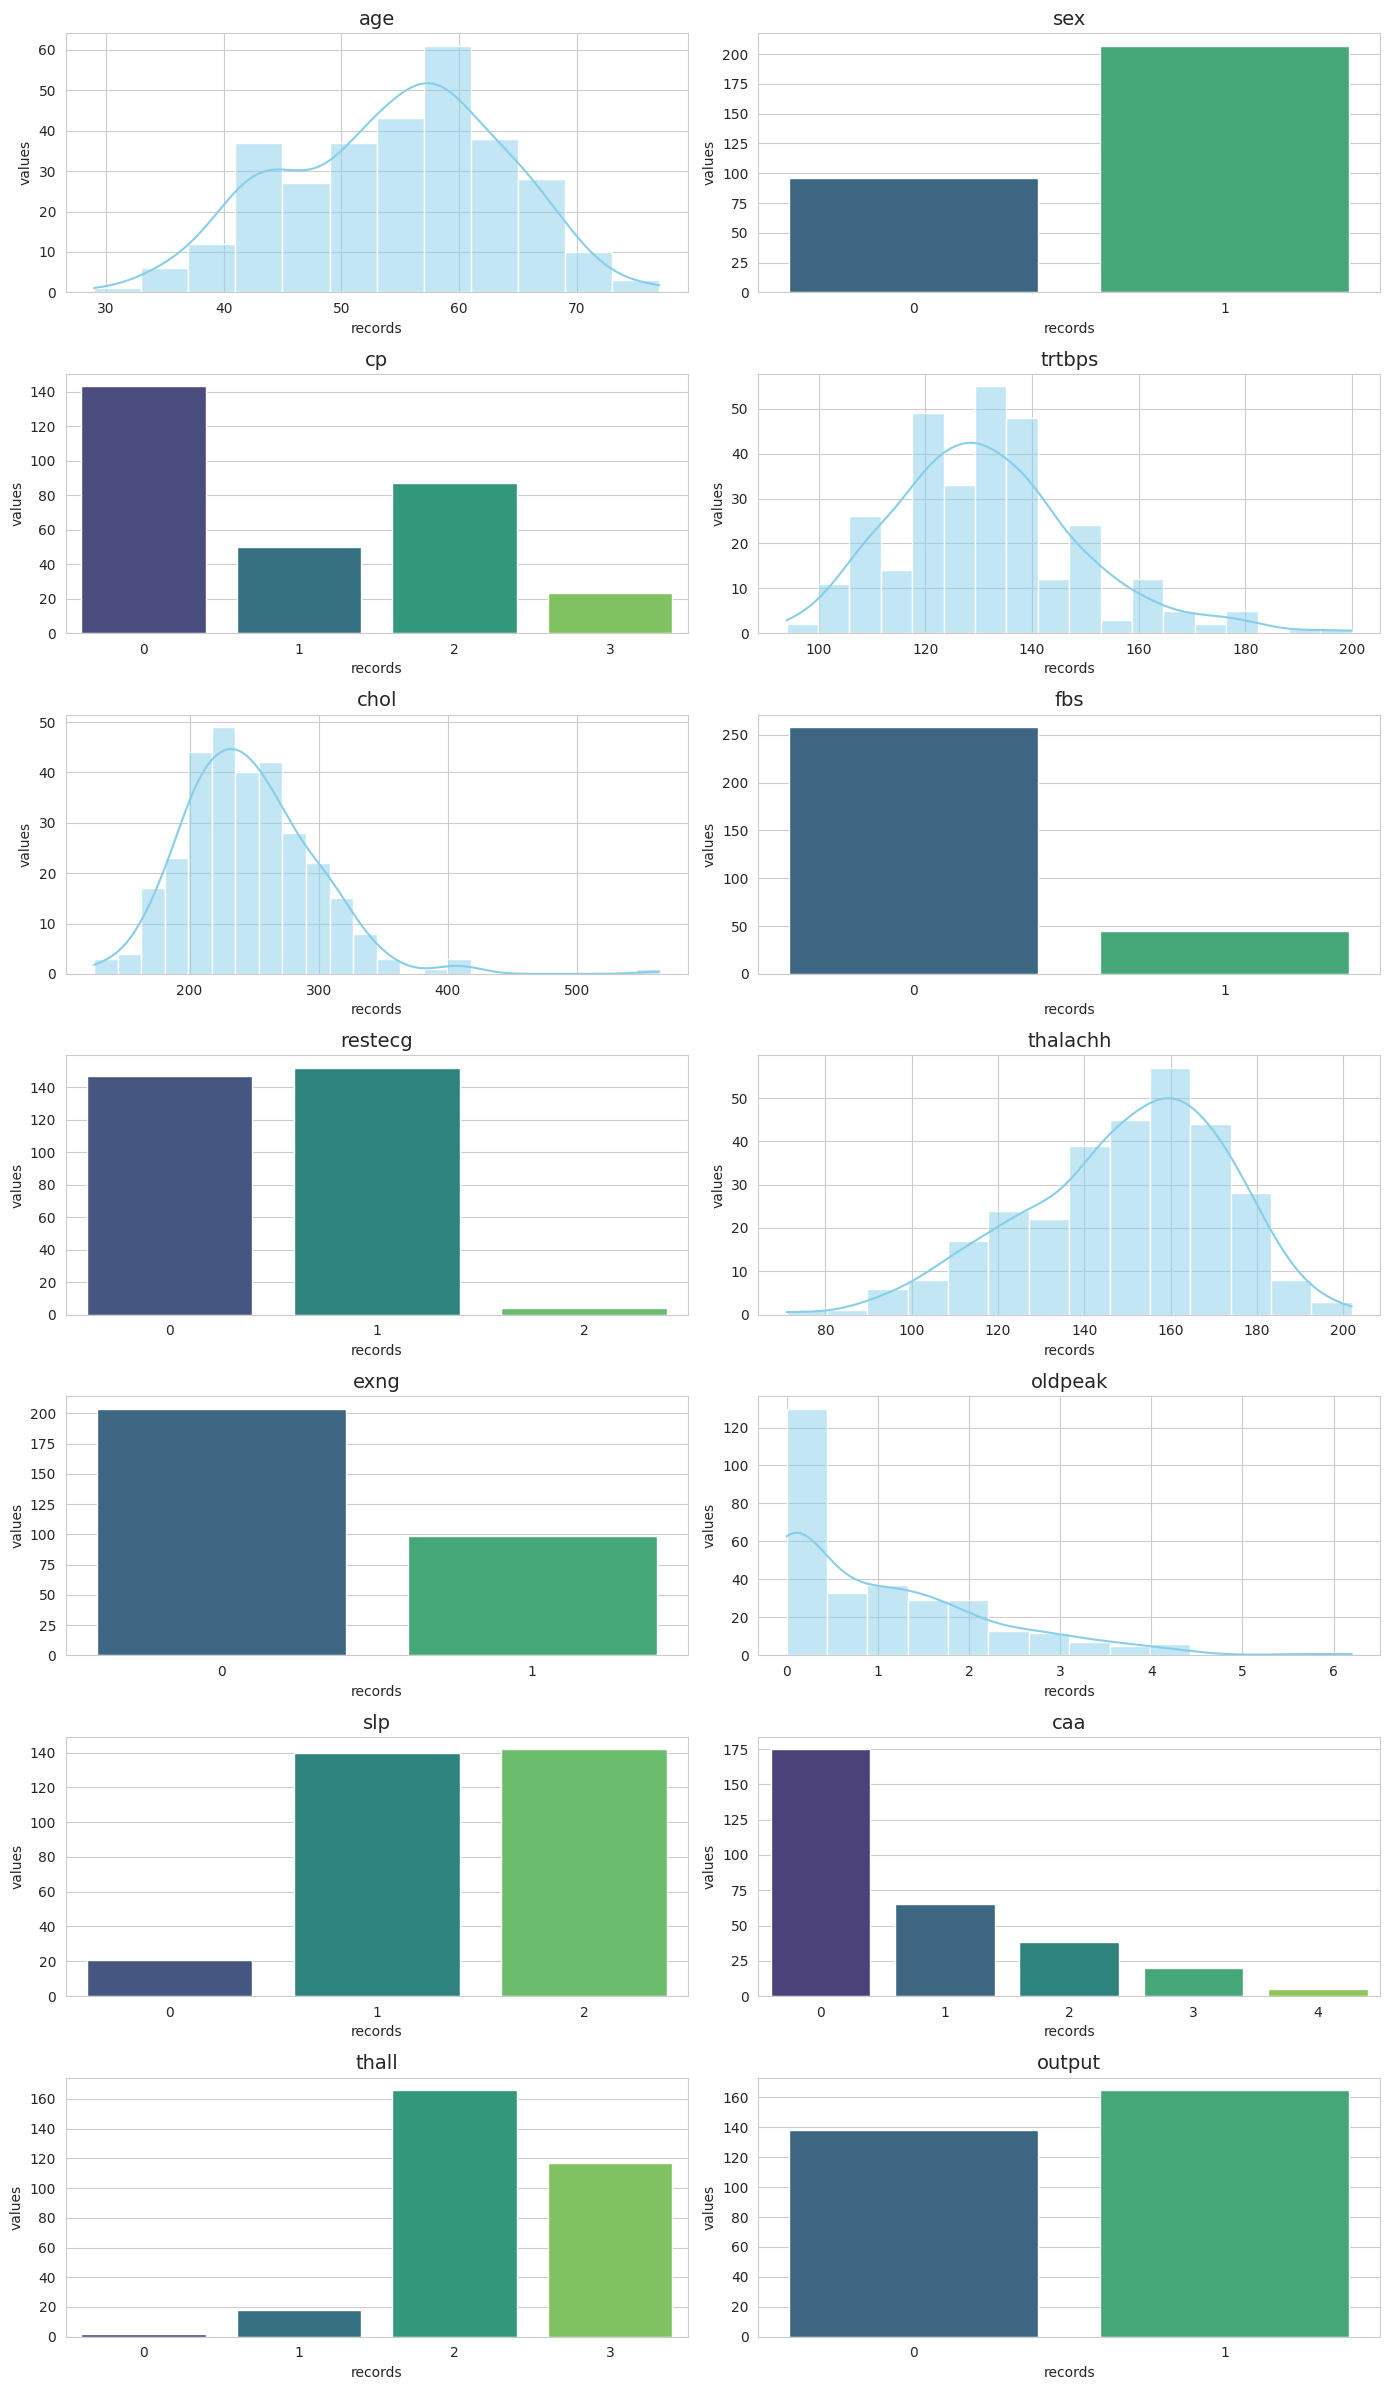

In [8]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot distributions of each feature
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 24))
axes = axes.flatten()  # Flatten the array to iterate easily

for i, col in enumerate(data.columns):
    # For binary and categorical features, use countplot
    if len(data[col].unique()) <= 10:
        sns.countplot(data=data, x=col, ax=axes[i], palette='viridis')
    else:
        # For numeric features, use distplot/histplot
        sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')

    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('records')
    axes[i].set_ylabel('values')

plt.tight_layout()
plt.show()


**age:** This histogram with a kernel density estimate (KDE) shows the distribution of ages within the dataset. It seems to be roughly normally distributed with a slight right skew, indicating there are more younger individuals than older in the dataset.

**sex:** This bar plot shows the count of individuals by sex. The green bar (likely representing males given the context of heart disease prevalence) is higher than the blue bar (likely representing females), indicating there are more males than females in this dataset.

**cp (chest pain type):** The bar plot shows the distribution of chest pain types across four categories (0 to 3). The category '0' appears to be the most frequent, while '3' is the least frequent.

**trtbps (resting blood pressure):** The histogram with KDE suggests that the resting blood pressure is roughly normally distributed with a slight right skew.

**chol (serum cholesterol):** The histogram with KDE indicates that serum cholesterol levels are right-skewed, with a majority of individuals having lower cholesterol levels and fewer individuals having very high cholesterol levels.

**fbs (fasting blood sugar):** The bar plot shows the count of individuals with fasting blood sugar above 120 mg/dl ('1') is significantly lower than those with levels below 120 mg/dl ('0').

**restecg (resting electrocardiographic results):** The bar plot displays three categories (0 to 2), with '1' being the most common result in the dataset, followed by '0', and '2' being the least common.

**thalachh (maximum heart rate achieved):** The histogram with KDE shows that the maximum heart rate achieved is roughly normally distributed with a slight left skew.

**exng (exercise induced angina):** The bar plot indicates that fewer individuals experience exercise-induced angina ('1') compared to those who do not ('0').

**oldpeak:** The histogram with KDE shows that ST depression induced by exercise relative to rest is mostly clustered near zero, indicating most individuals have a low oldpeak value, with a long tail to the right showing fewer individuals with higher values.

**slp (the slope of the peak exercise ST segment):** The bar plot indicates three categories (0 to 2) with the '2' category being the most frequent slope of the peak exercise ST segment.

**caa (number of major vessels colored by flourosopy):** The bar plot shows a distribution where '0' is the most common number of visible vessels, with a decreasing number of individuals as the count of visible vessels increases.

**thall (thalassemia):** The bar plot suggests that categories '2' and '3' are more common than '1', with '0' being the least common or possibly absent from this dataset.

**output:** This bar plot represents the outcome or target variable, showing the number of individuals with and without the event of interest (presumably the presence of heart disease). The bars indicate a relatively balanced distribution of the outcome variable.

In [9]:
integer_features = ['age','chol','trtbps','cp','thall','exng']
unique_values_train = pd.DataFrame(data[integer_features].nunique())
unique_values_train = unique_values_train.reset_index(drop=False)
unique_values_train.columns = ['Features', 'Count']

unique_values_percent_train = pd.DataFrame(data[integer_features].nunique()/data.shape[0])
unique_values_percent_train = unique_values_percent_train.reset_index(drop=False)
unique_values_percent_train.columns = ['Features', 'Count']

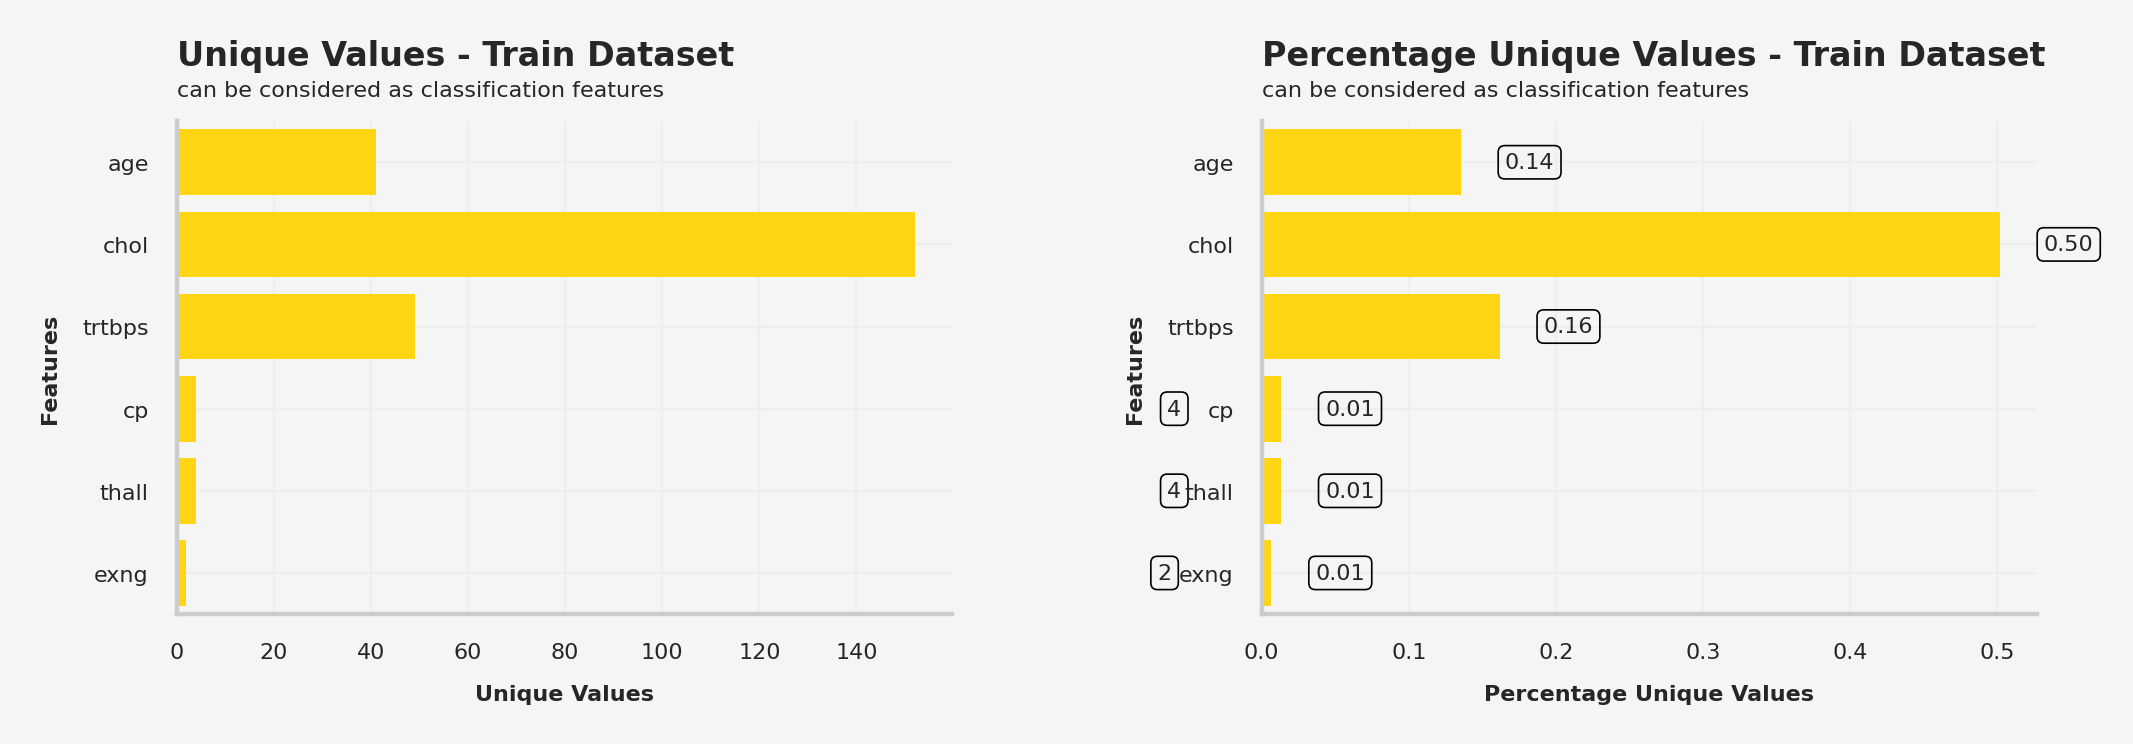

In [10]:
plt.rcParams['figure.dpi'] = 400
fig = plt.figure(figsize=(6, 4), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.4, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*6)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_values_train['Features'], x=unique_values_train['Count'],
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.5, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(0, -1, 'can be considered as classification features', fontsize=4, ha='left', va='top')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# data label
for p in ax0.patches:
    value = f'{p.get_width():,.0f}'
    x = p.get_x() + p.get_width() + 200
    y = p.get_y() + p.get_height() / 2
    ax0.text(x, y, value, ha='left', va='center', fontsize=4,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
ax1.set_facecolor(background_color)
ax1_sns = sns.barplot(ax=ax1, y=unique_values_percent_train['Features'], x=unique_values_percent_train['Count'],
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax1_sns.set_xlabel("Percentage Unique Values",fontsize=4, weight='bold')
ax1_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax1_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1.text(0, -1.5, 'Percentage Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold')
ax1.text(0, -1, 'can be considered as classification features', fontsize=4, ha='left', va='top')
# data label
for p in ax1.patches:
    value = f'{p.get_width():.2f}'
    x = p.get_x() + p.get_width() + 0.03
    y = p.get_y() + p.get_height() / 2
    ax1.text(x, y, value, ha='left', va='center', fontsize=4,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*6)

### Hypothesis testing:

Null Hypothesis (H0): There is no significance relationship between the independent variables and the outcome variable.

Alternate Hypothesis (Ha): There is a significance relationship between the independent variable and the outcome variable.

#### Shapiro-Wilk Test

In [11]:
# Check unique values and distribution of 'caa'
caa_unique_values = data['caa'].unique()

# Check for normality of continuous variables using Shapiro-Wilk test
from scipy.stats import shapiro

# List of numeric variables to check for normality
numeric_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Perform Shapiro-Wilk test for normality
normality_results = {var: shapiro(data[var]) for var in numeric_vars}

caa_unique_values, normality_results


(array([0, 2, 1, 3, 4]),
 {'age': ShapiroResult(statistic=0.9863712787628174, pvalue=0.005800595041364431),
  'trtbps': ShapiroResult(statistic=0.9659166932106018, pvalue=1.4575286968465662e-06),
  'chol': ShapiroResult(statistic=0.9468811750411987, pvalue=5.364368060867264e-09),
  'thalachh': ShapiroResult(statistic=0.9763153195381165, pvalue=6.620732165174559e-05),
  'oldpeak': ShapiroResult(statistic=0.8441835045814514, pvalue=8.183467206576554e-17)})

**Shapiro-Wilk Test** for Normality
Reject the Null Hypothesis (H0) for all numeric variables ('age', 'trtbps', 'chol', 'thalachh', 'oldpeak'): The p-values are below the common alpha level of 0.05, indicating that the distributions of these variables significantly deviate from a normal distribution.



#### CHI-SQUARED TEST

In [12]:

# List of categorical variables for Chi-Square Test
categorical_vars = ['cp', 'restecg', 'slp', 'thall', 'caa']

# Perform Chi-Square Test for each categorical variable against the output
chi_square_results = {}
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['output'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[var] = {'Chi2': chi2, 'p-value': p}

chi_square_results


{'cp': {'Chi2': 81.68642755194445, 'p-value': 1.3343043373050064e-17},
 'restecg': {'Chi2': 10.023091785081, 'p-value': 0.006660598773498031},
 'slp': {'Chi2': 47.506896756030244, 'p-value': 4.830681934276837e-11},
 'thall': {'Chi2': 85.30373951466147, 'p-value': 2.2333507210129364e-18},
 'caa': {'Chi2': 74.36663061195097, 'p-value': 2.712470211959332e-15}}

**Chi-Square Test** for Categorical Variables
cp, restecg, slp, thall, caa: For all these categorical variables, we reject the null hypothesis of no association between each of these variables and the outcome. The p-values are significantly low, indicating strong evidence against the null hypothesis and suggesting that these categorical variables have a significant relationship with the outcome variable.

####Mann-Whitney U Test

In [13]:
# List of numeric variables for Mann-Whitney U Test
numeric_vars_for_test = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Perform Mann-Whitney U Test for each numeric variable against the 'output'
mwu_results = {}
for var in numeric_vars_for_test:
    # Splitting the data into two groups based on the output
    group1 = data[data['output'] == 0][var]
    group2 = data[data['output'] == 1][var]

    # Perform the test
    stat, p = mannwhitneyu(group1, group2)
    mwu_results[var] = {'U-statistic': stat, 'p-value': p}

mwu_results


{'age': {'U-statistic': 14529.5, 'p-value': 3.4385103183228994e-05},
 'trtbps': {'U-statistic': 12985.5, 'p-value': 0.03465244526020498},
 'chol': {'U-statistic': 12980.5, 'p-value': 0.03571518201137642},
 'thalachh': {'U-statistic': 5732.0, 'p-value': 9.796555056515248e-14},
 'oldpeak': {'U-statistic': 16848.0, 'p-value': 2.406978688694334e-13}}

**Mann-Whitney U Test** for Numeric Variables Against Binary Outcome
age, trtbps, chol, thalachh, oldpeak: For each of these numeric variables, the null hypothesis of no difference in distributions between the two groups defined by the outcome variable is rejected. The p-values are below the 0.05 threshold, indicating significant differences in these variables between patients with and without heart disease.

Numeric Variables ('age', 'trtbps', 'chol', 'thalachh', 'oldpeak'): All show significant differences between groups defined by the outcome, rejecting the null hypothesis and supporting the alternate hypothesis that there is a significant relationship with the outcome variable.

Categorical Variables ('cp', 'restecg', 'slp', 'thall', 'caa'): The significant Chi-Square test results reject the null hypothesis, indicating a significant association with the outcome variable.

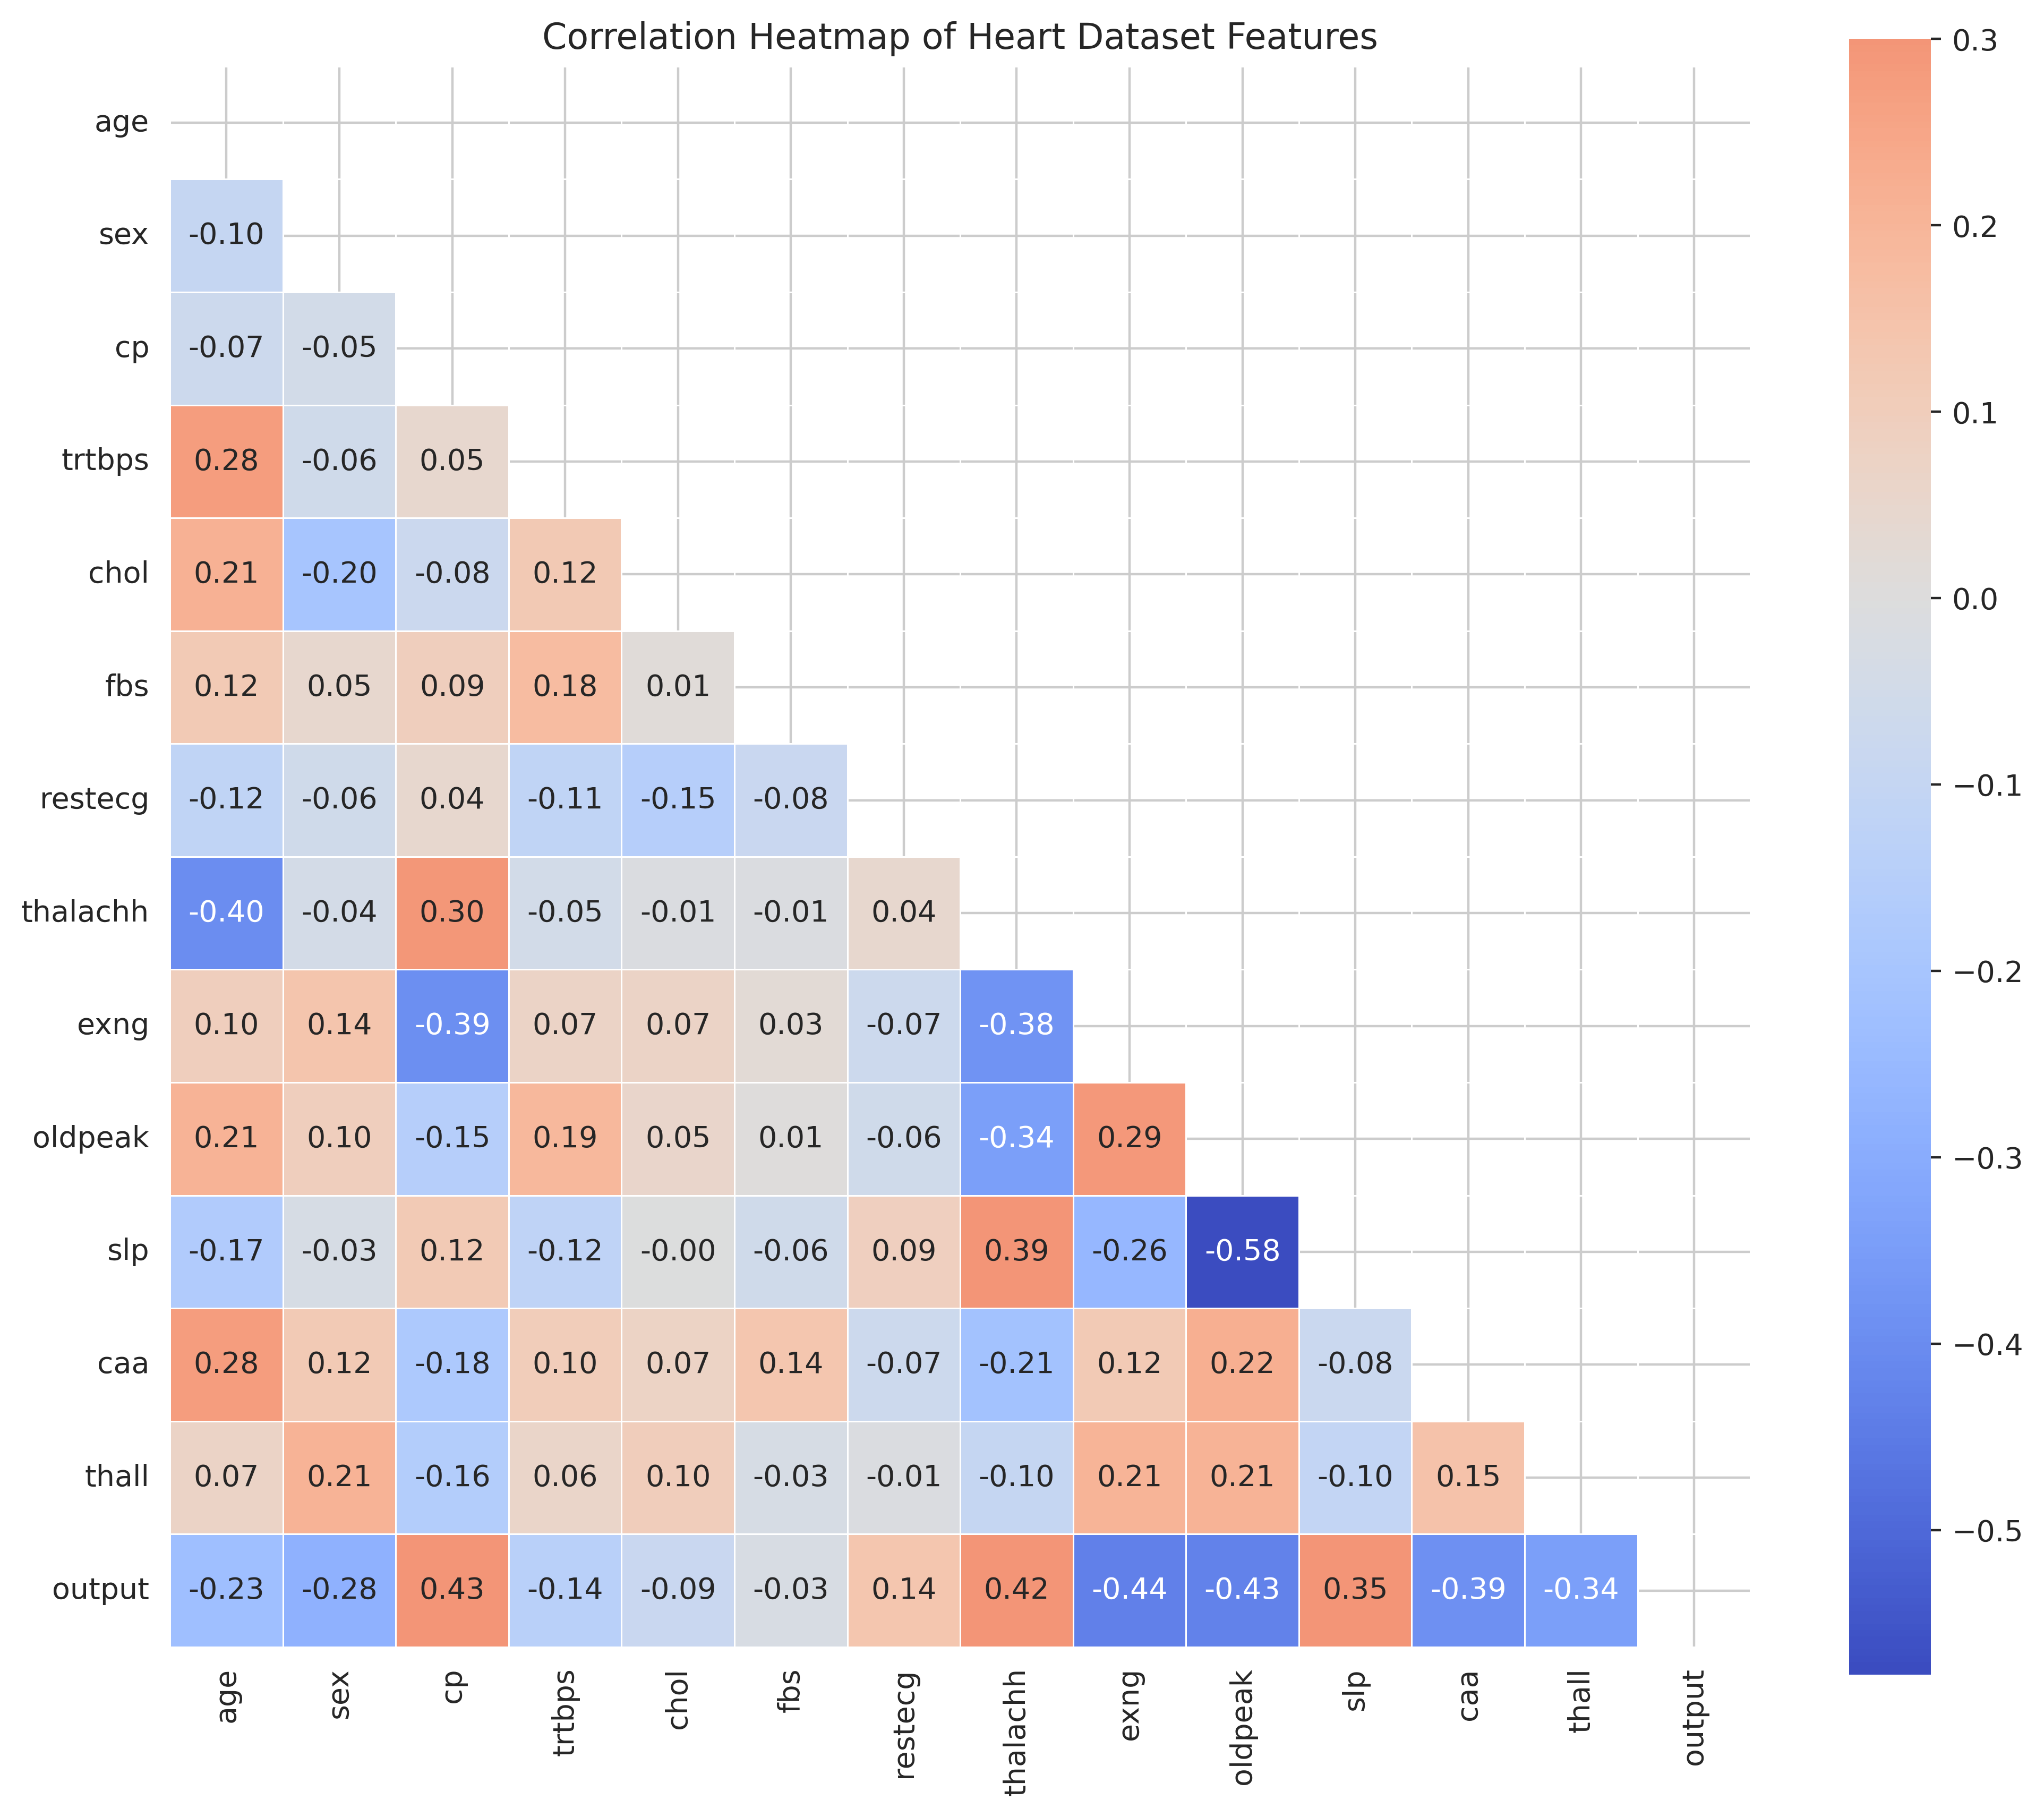

In [14]:
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")

plt.title('Correlation Heatmap of Heart Dataset Features')
plt.show()

**Output (target variable)** has a:

**age:** Negatively correlated with output (-0.23). Older age is slightly associated with a decrease in the likelihood of the presence of heart disease in this dataset.

**sex:** Negatively correlated with output (-0.28). The encoded sex (assuming 1 for male and 0 for female or vice versa) is moderately associated with a decrease in the likelihood of the presence of heart disease.

**cp (chest pain type):** Positively correlated with output (0.43). Having a higher category of chest pain type is strongly associated with an increased likelihood of the presence of heart disease.

**trtbps (resting blood pressure):** Slightly negatively correlated with output (-0.14). Higher resting blood pressure is weakly associated with a decreased likelihood of the presence of heart disease, but this relationship is not strong.

**chol (serum cholesterol):** Very weakly negatively correlated with output (-0.09). Serum cholesterol level has a very weak inverse association with the presence of heart disease.

**fbs (fasting blood sugar):** Very weakly positively correlated with output (0.14). Fasting blood sugar being above 120 mg/dl has a very weak association with an increased likelihood of the presence of heart disease.

**restecg (resting electrocardiographic results):** Negatively correlated with output (-0.03). There is almost no linear relationship between resting electrocardiographic results and the presence of heart disease.

**thalachh (maximum heart rate achieved):** Positively correlated with output (0.42). A higher maximum heart rate achieved is moderately associated with an increased likelihood of the presence of heart disease.

**exng (exercise induced angina):** Negatively correlated with output (-0.44). The presence of exercise-induced angina is strongly associated with a decrease in the likelihood of the presence of heart disease.

**oldpeak (ST depression induced by exercise relative to rest):** Negatively correlated with output (-0.43). A higher value of ST depression is strongly associated with a decrease in the likelihood of the presence of heart disease.

**slp (the slope of the peak exercise ST segment):** Positively correlated with output (0.35). A higher slope of the peak exercise ST segment is moderately associated with an increased likelihood of the presence of heart disease.

**caa (number of major vessels colored by flourosopy):** Negatively correlated with output (-0.39). A higher number of visible vessels is strongly associated with a decrease in the likelihood of the presence of heart disease.

**thall (thalassemia):** Negatively correlated with output (-0.34). Certain categories of thalassemia (assuming '3' is normal and '0', '1', '2' indicate different severities) are moderately associated with a decrease in the likelihood of the presence of heart disease.

#### Feature Selection:

Let us use built in feature selection method and the other is through the insights from previous tests and compare the results.

In [16]:

# Prepare your features and target variables
X = data.drop('output', axis=1)
y = data['output']

# For f_classif
selector_f_classif = SelectKBest(score_func=f_classif, k='all')
X_new_f_classif = selector_f_classif.fit_transform(X, y)
scores_f_classif = selector_f_classif.scores_

# For chi2
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
selector_chi2 = SelectKBest(score_func=chi2, k='all')
X_new_chi2 = selector_chi2.fit_transform(X_scaled, y)
scores_chi2 = selector_chi2.scores_

# Combine the scores into a DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_classif_Score': scores_f_classif,
    'Chi2_Score': scores_chi2
}).sort_values(by='F_classif_Score', ascending=False)

print(feature_scores)

     Feature  F_classif_Score  Chi2_Score
8       exng        70.952438   38.914377
2         cp        69.772271   20.866033
9    oldpeak        68.551439   11.716815
7   thalachh        65.120104    2.735347
11       caa        54.559834   16.610191
10       slp        40.902071    4.902048
12     thall        40.407696    1.930618
1        sex        25.792191    7.576835
0        age        16.116700    1.039771
3     trtbps         6.458169    0.489248
6    restecg         5.777209    1.489135
4       chol         2.202983    0.111905
5        fbs         0.236942    0.202934


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv')

# Define features and target
X = data.drop('output', axis=1)
y = data['output']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models and their hyperparameters
models = [
    ('LogisticRegression', LogisticRegression(multi_class='multinomial'), {
        'clf__C': [0.1, 1.0, 10.0]
    }),
    ('RandomForestClassifier', RandomForestClassifier(), {
        'clf__n_estimators': [10, 100, 1000],
        'clf__max_depth': [5, 10, None]
    }),
    ('SVC', SVC(), {
        'clf__C': [0.1, 1.0, 10.0],
        'clf__kernel': ['linear', 'rbf']
    }),
    # Add as many models as you want to compare
]

results = []

# Perform hyperparameter tuning and evaluation for each model
for name, model, params in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # It's good practice to scale features for classifiers
        ('clf', model)
    ])

    clf = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=5)

    results.append({
        'Model': name,
        'Best Score': clf.best_score_,
        'Best Params': clf.best_params_,
        'CV Score Mean': scores.mean(),
        'CV Score Std': scores.std()
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
print(results_df)

                    Model  Best Score  \
0      LogisticRegression    0.822109   
1  RandomForestClassifier    0.805867   
2                     SVC    0.818367   

                                         Best Params  CV Score Mean  \
0                                    {'clf__C': 1.0}       0.809694   
1  {'clf__max_depth': None, 'clf__n_estimators': ...       0.797279   
2              {'clf__C': 1.0, 'clf__kernel': 'rbf'}       0.809864   

   CV Score Std  
0      0.060612  
1      0.045220  
2      0.027424  


In [20]:
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined and are available from previous steps

# Initialize models with the best parameters
model_logreg = LogisticRegression(C=1.0, multi_class='multinomial', max_iter=1000)
model_rf = RandomForestClassifier(n_estimators=1000, max_depth=None)
model_svc = SVC(C=1.0, kernel='rbf')

# Fit models
model_logreg.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svc.fit(X_train, y_train)

# Predictions
y_pred_logreg = model_logreg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svc = model_svc.predict(X_test)

# Accuracy Scores
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Compile results into a DataFrame
results_comparison = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'SVC'],
    'Accuracy Score': [accuracy_logreg, accuracy_rf, accuracy_svc]
})

results_comparison


,Model,Accuracy Score
0,LogisticRegression,0.852459
1,RandomForestClassifier,0.852459
2,SVC,0.704918
